<a href="https://colab.research.google.com/github/Fahim-Saharear/PROJECT/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import datetime as dt
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import seaborn as sns
import random
import math
import time
import datetime
import operator 

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.graph_objs import *
import warnings

%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
plt.style.use('fivethirtyeight')
%matplotlib inline

import statsmodels.api as sm
from datetime import timedelta
from fbprophet import Prophet
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#install the dependencies
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fahimsaharear","key":"c1c3567bd4424c03901e75ab73ba5e18"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset

  0% 0.00/916k [00:00<?, ?B/s]
100% 916k/916k [00:00<00:00, 63.0MB/s]


In [6]:
from zipfile import ZipFile
file_name = "novel-corona-virus-2019-dataset.zip"

with ZipFile(file_name,'r') as zp:
  zp.extractall()
  print('Done')

Done


In [7]:
%%time
import requests

for filename in ['time_series_covid19_confirmed_global.csv',
                 'time_series_covid19_deaths_global.csv',
                 'time_series_covid19_recovered_global.csv',
                 'time_series_covid19_confirmed_US.csv',
                 'time_series_covid19_deaths_US.csv']:
    print(f'Downloading {filename}')
    url = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/{filename}'
    myfile = requests.get(url)
    open(filename, 'wb').write(myfile.content)

CPU times: user 75.9 ms, sys: 13.4 ms, total: 89.3 ms
Wall time: 486 ms


In [0]:
confirmed_df = pd.read_csv('time_series_covid_19_confirmed.csv') 
deaths_df = pd.read_csv('time_series_covid_19_deaths.csv')
recoveries_df = pd.read_csv('time_series_covid_19_recovered.csv')

covid = pd.read_csv('covid_19_data.csv')

In [9]:
covid_bd = covid[covid["Country/Region"]=="Bangladesh"]
covid_bd["ObservationDate"] = pd.to_datetime(covid_bd["ObservationDate"])
bd_datewise=covid_bd.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
bd_datewise

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-03-08,3.0,0.0,0.0
2020-03-09,3.0,0.0,0.0
2020-03-10,3.0,0.0,0.0
2020-03-11,3.0,0.0,0.0
2020-03-12,3.0,0.0,0.0
2020-03-13,3.0,0.0,0.0
2020-03-14,3.0,0.0,0.0
2020-03-15,5.0,0.0,0.0
2020-03-16,8.0,2.0,0.0


In [10]:
#Adding week column to perfom weekly analysis further ahead
bd_datewise["WeekofYear"] = bd_datewise.index.weekofyear
bd_datewise["Days Since"] = (bd_datewise.index-bd_datewise.index[0])
bd_datewise["Days Since"] = bd_datewise["Days Since"].dt.days

grouped_country = covid.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
grouped_country["Active Cases"] = grouped_country["Confirmed"] - grouped_country["Recovered"] - grouped_country["Deaths"]
grouped_country["log_confirmed"] = np.log(grouped_country["Confirmed"])
grouped_country["log_active"] = np.log(grouped_country["Active Cases"])

print("Number of Confirmed Cases",bd_datewise["Confirmed"].iloc[-1])
print("Number of Recovered Cases",bd_datewise["Recovered"].iloc[-1])
print("Number of Death Cases",bd_datewise["Deaths"].iloc[-1])
print("Number of Active Cases",bd_datewise["Confirmed"].iloc[-1] - bd_datewise["Recovered"].iloc[-1] - bd_datewise["Deaths"].iloc[-1])
print("Number of Closed Cases",bd_datewise["Recovered"].iloc[-1] + bd_datewise["Deaths"].iloc[-1])
print("Approximate Number of Confirmed Cases per day",round(bd_datewise["Confirmed"].iloc[-1]/bd_datewise.shape[0]))
print("Approximate Number of Recovered Cases per day",round(bd_datewise["Recovered"].iloc[-1]/bd_datewise.shape[0]))
print("Approximate Number of Death Cases per day",round(bd_datewise["Deaths"].iloc[-1]/bd_datewise.shape[0]))
print("Number of New Cofirmed Cases in last 24 hours are",bd_datewise["Confirmed"].iloc[-1]-bd_datewise["Confirmed"].iloc[-2])
print("Number of New Recoverd Cases in last 24 hours are",bd_datewise["Recovered"].iloc[-1]-bd_datewise["Recovered"].iloc[-2])
print("Number of New Death Cases in last 24 hours are",bd_datewise["Deaths"].iloc[-1]-bd_datewise["Deaths"].iloc[-2])

Number of Confirmed Cases 10929.0
Number of Recovered Cases 1403.0
Number of Death Cases 183.0
Number of Active Cases 9343.0
Number of Closed Cases 1586.0
Approximate Number of Confirmed Cases per day 185.0
Approximate Number of Recovered Cases per day 24.0
Approximate Number of Death Cases per day 3.0
Number of New Cofirmed Cases in last 24 hours are 786.0
Number of New Recoverd Cases in last 24 hours are 194.0
Number of New Death Cases in last 24 hours are 1.0


Text(0.5, 1.0, 'Distribution of Number of Active Cases in Bangladesh over Date')

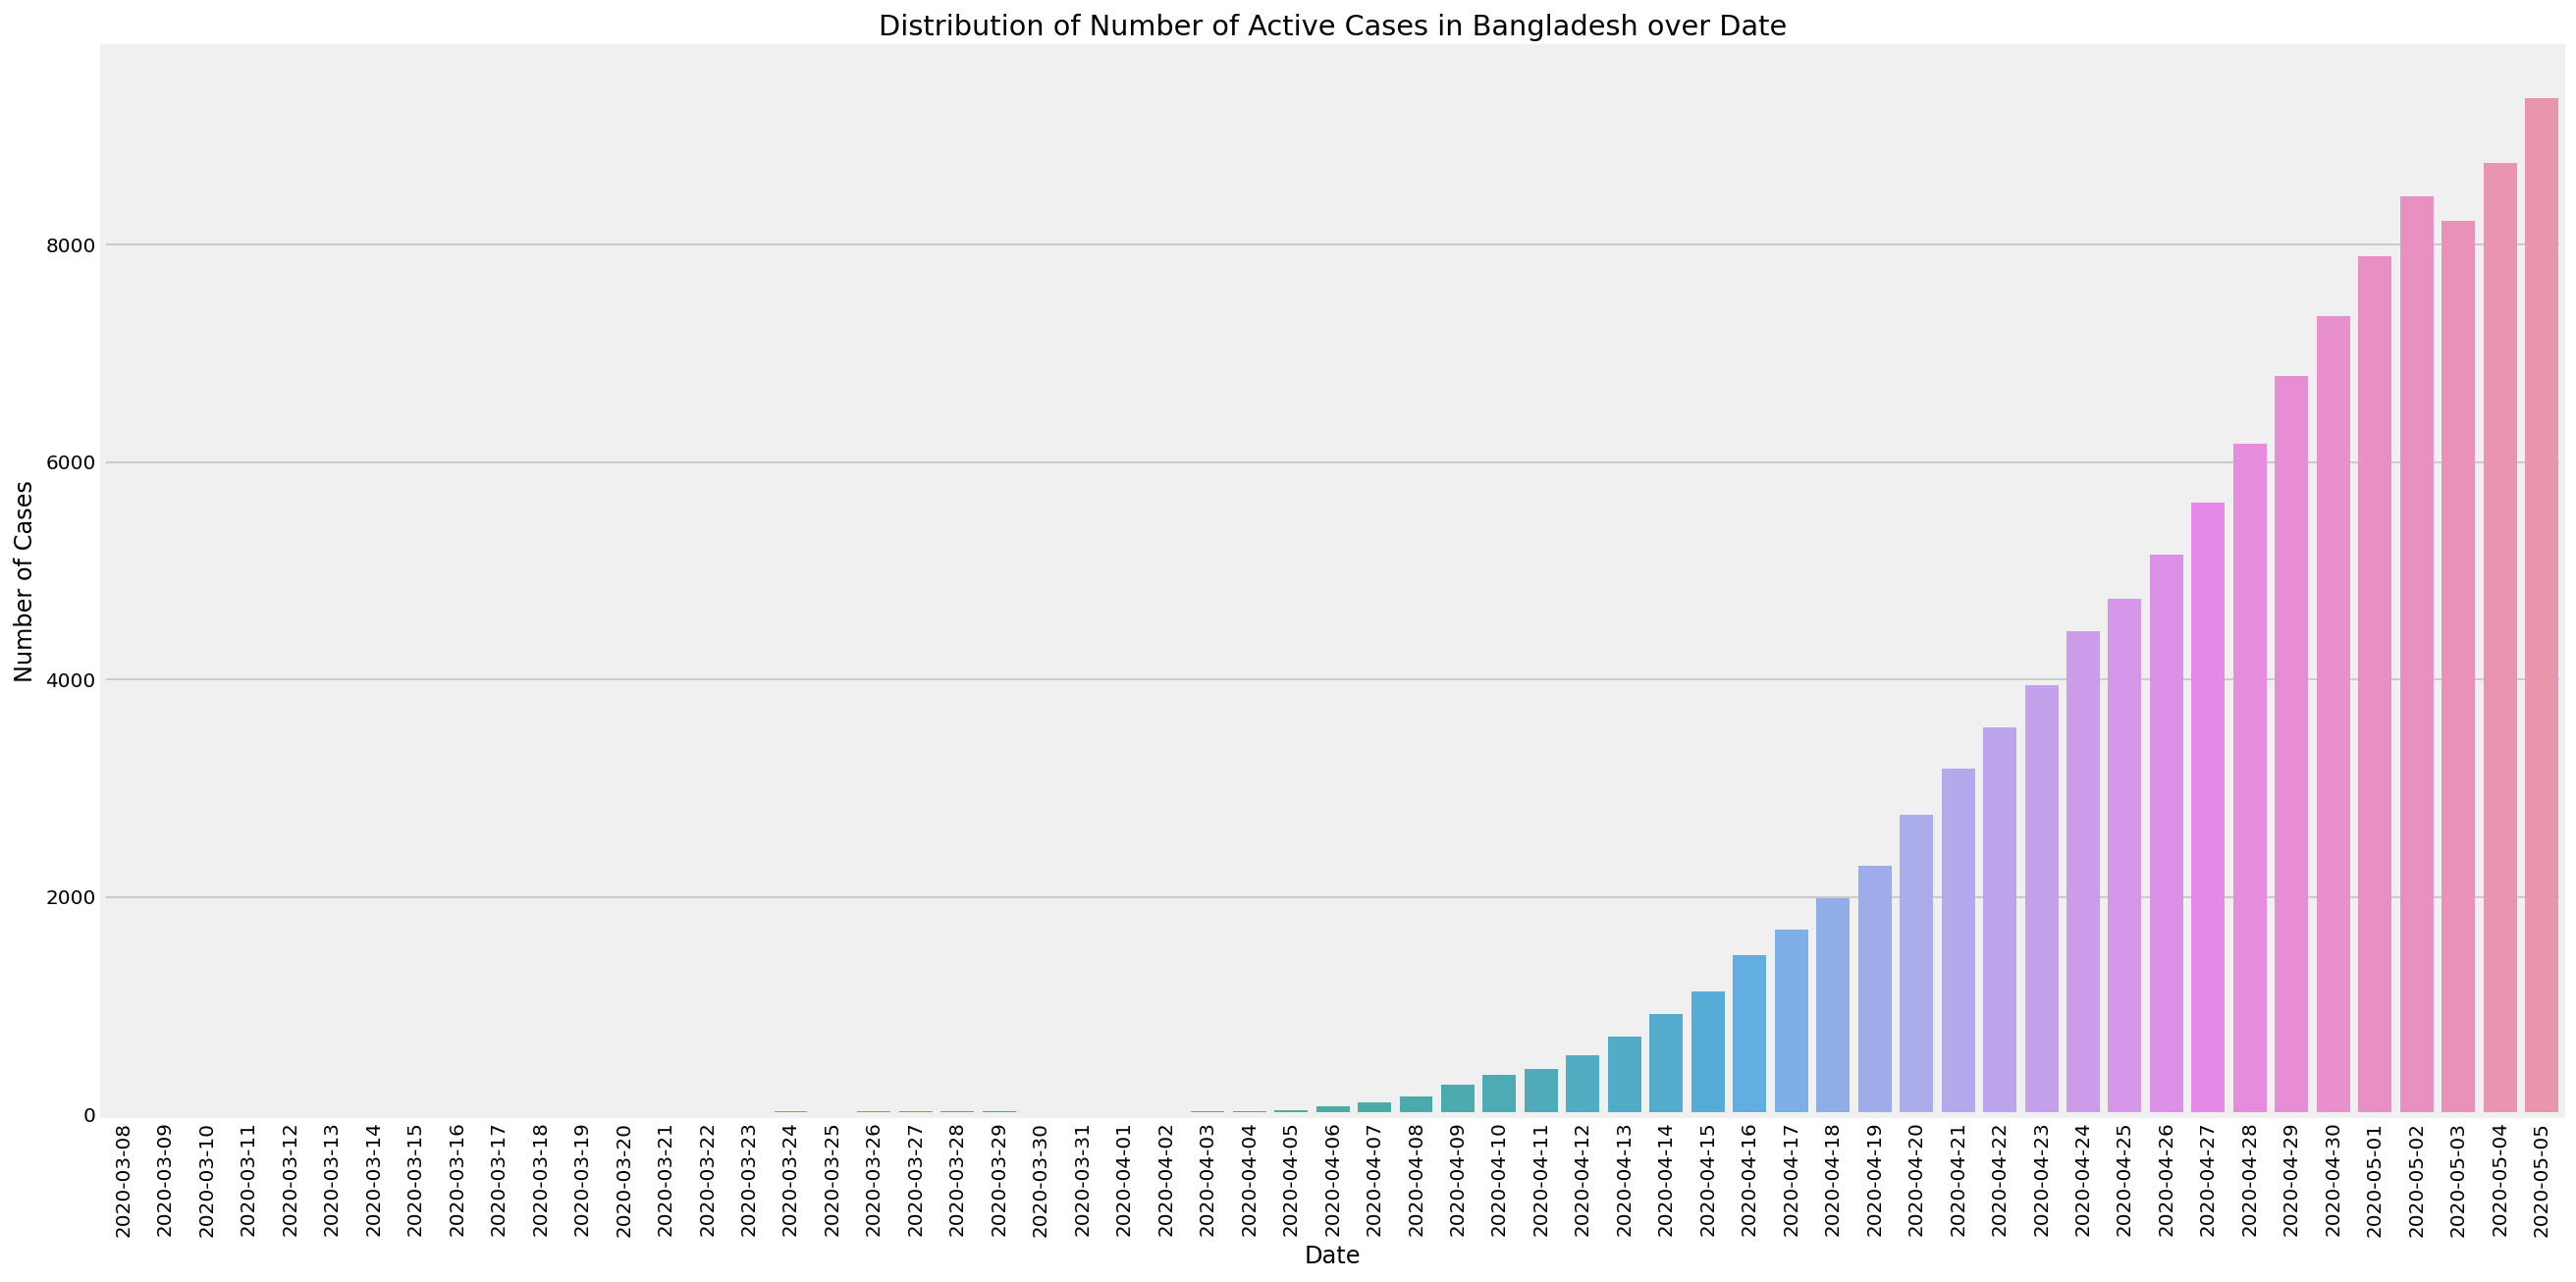

In [11]:
plt.figure(figsize=(20,10))
sns.barplot(x=bd_datewise.index.date, y=bd_datewise["Confirmed"] - bd_datewise["Recovered"] - bd_datewise["Deaths"])
plt.xticks(rotation=90)
plt.ylabel("Number of Cases")
plt.xlabel("Date")
plt.title("Distribution of Number of Active Cases in Bangladesh over Date")

Text(0.5, 1.0, 'Distribution of Number of Closed Cases in Bangladesh over Date')

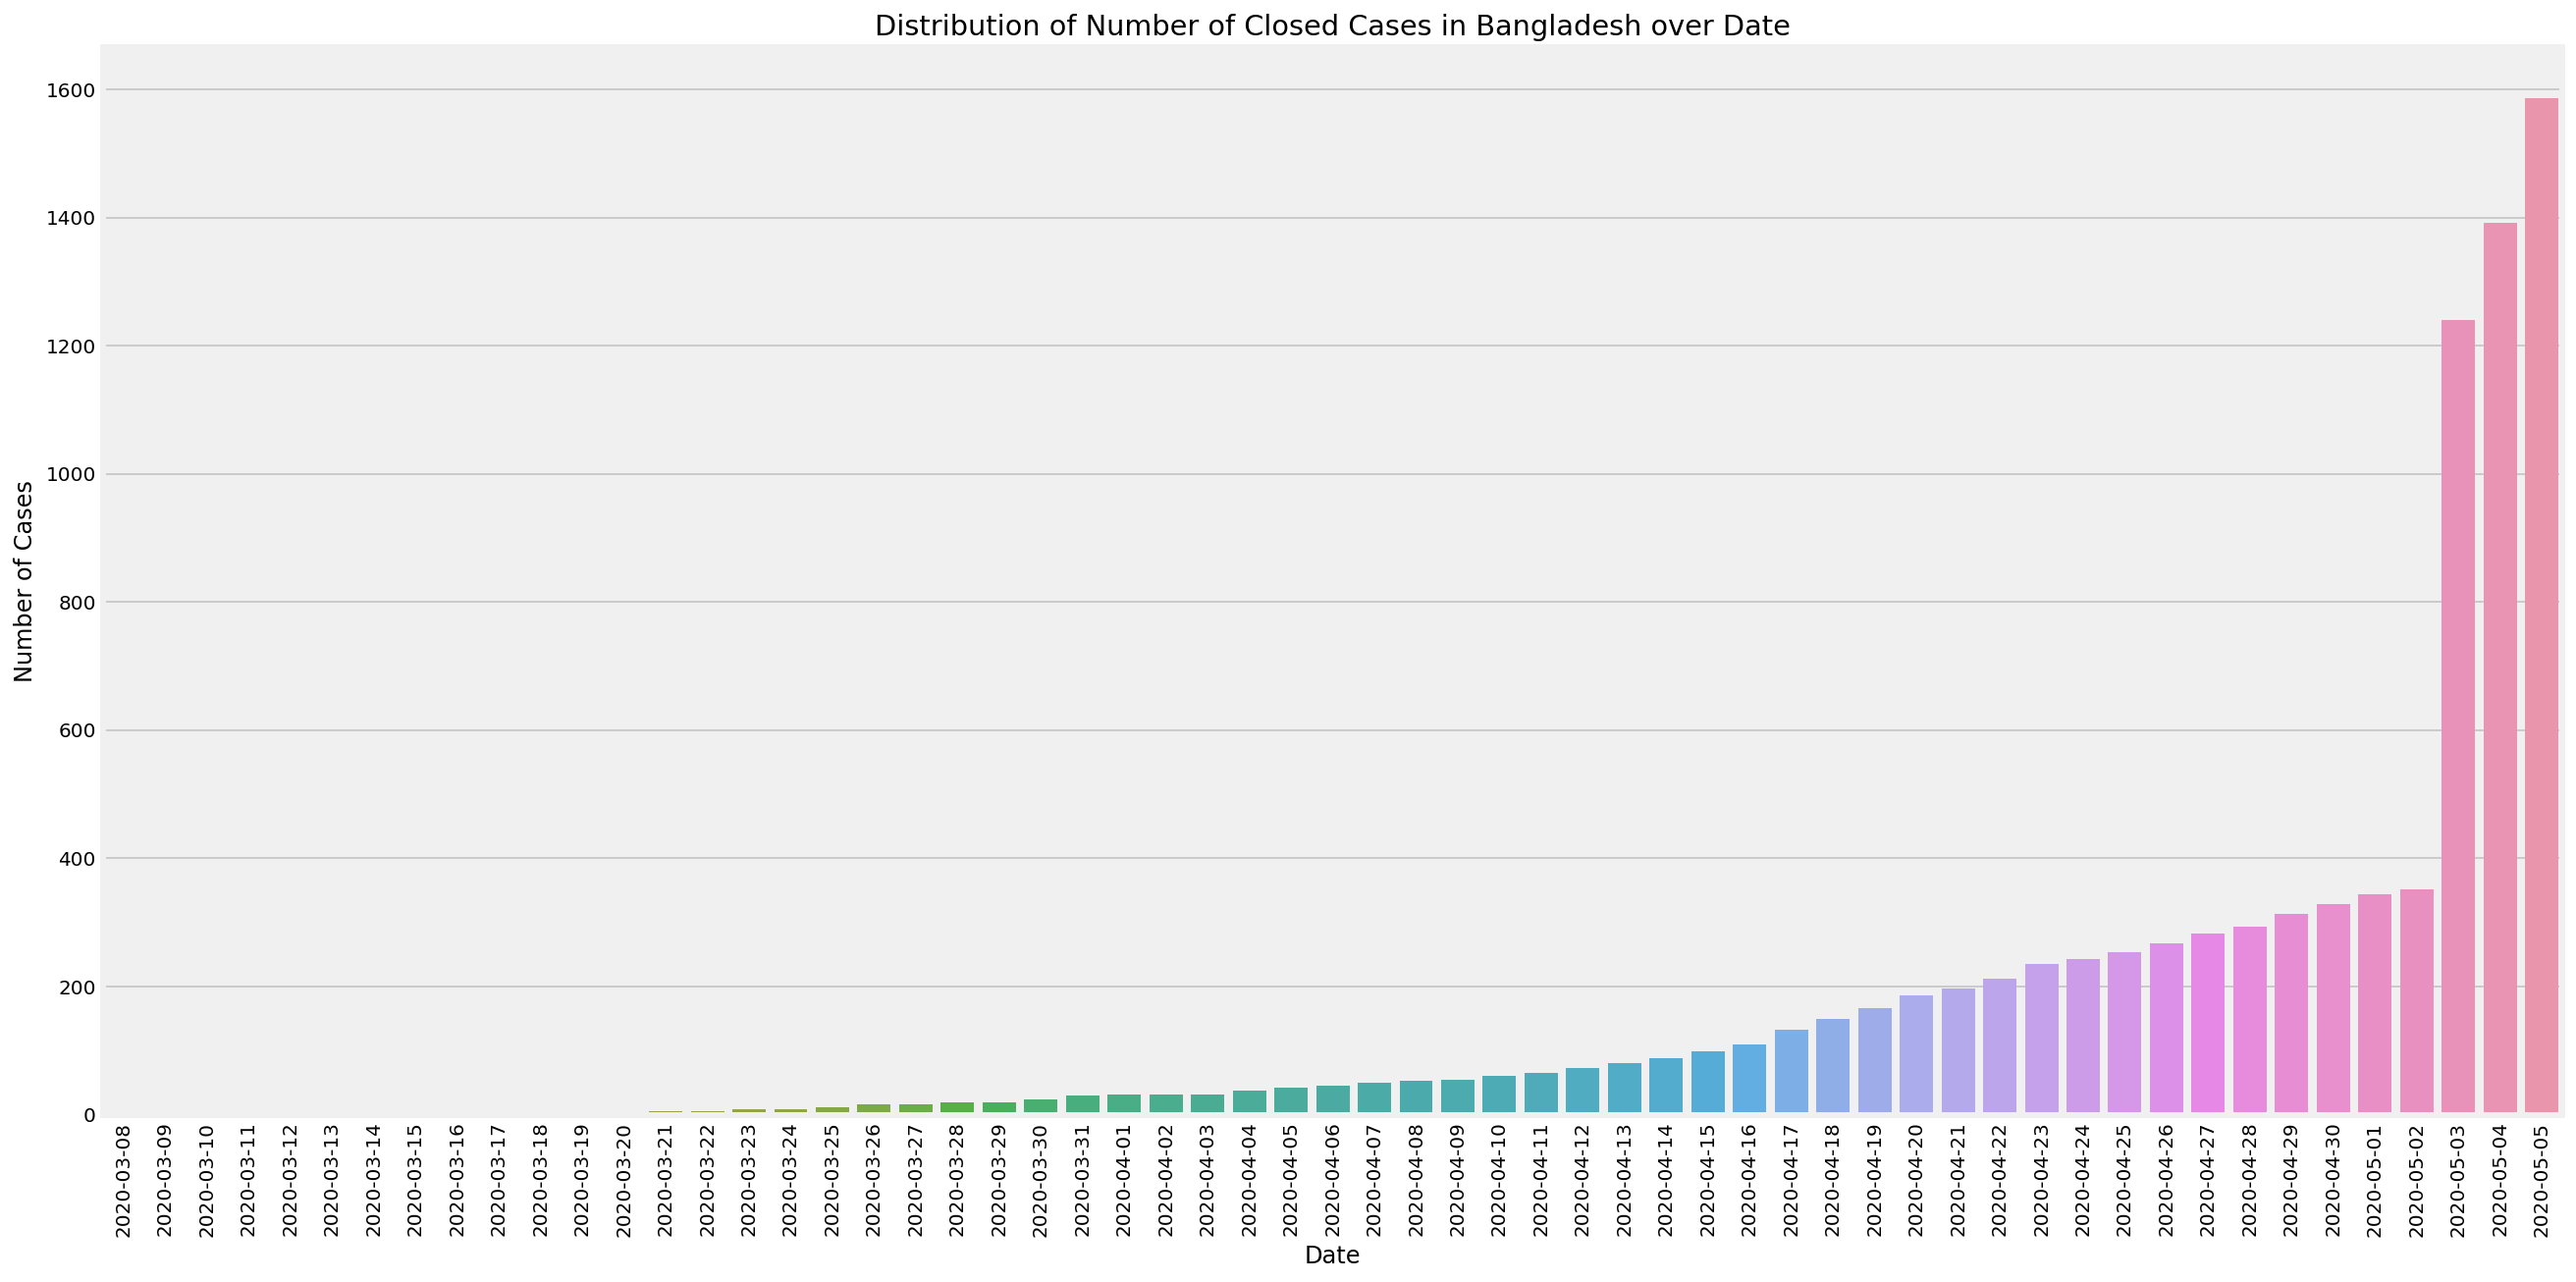

In [12]:
plt.figure(figsize=(20,10))
sns.barplot(x=bd_datewise.index.date, y=bd_datewise["Recovered"] + bd_datewise["Deaths"])
plt.xticks(rotation=90)
plt.ylabel("Number of Cases")
plt.xlabel("Date")
plt.title("Distribution of Number of Closed Cases in Bangladesh over Date")

In [13]:
fig_1 = px.bar(x=bd_datewise.index.date, y=bd_datewise["Confirmed"])
fig_2 = px.bar(x=bd_datewise.index.date, y=bd_datewise["Recovered"])
fig_3 = px.bar(x=bd_datewise.index.date, y=bd_datewise["Deaths"])

fig = make_subplots(rows=1, cols=3, shared_xaxes=False, horizontal_spacing=0.1,
                    subplot_titles=('No. of new cases everyday', 'No. of recoveries everyday', 'No. of deaths everyday'))

fig.add_trace(fig_1['data'][0], row=1, col=1)
fig.add_trace(fig_2['data'][0], row=1, col=2)
fig.add_trace(fig_3['data'][0], row=1, col=3)

fig.update_layout(height=480)
fig.show()

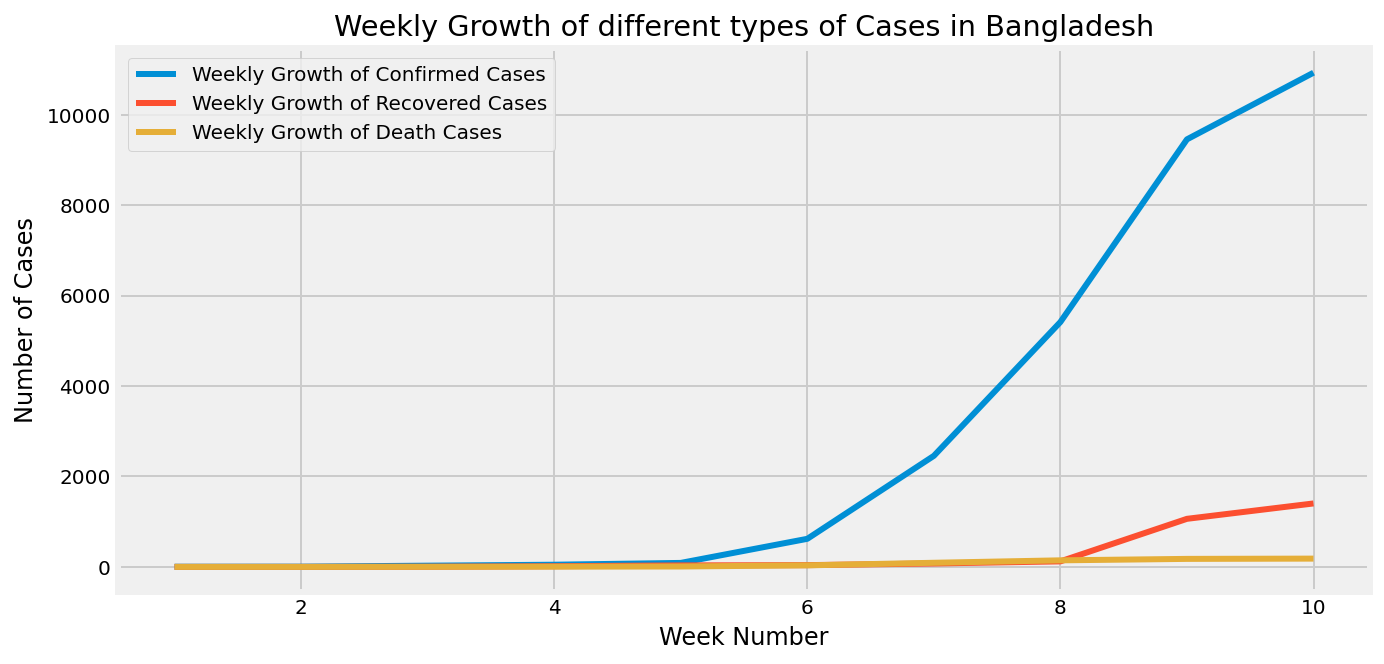

In [14]:
week_num_bd = []
bd_weekwise_confirmed = []
bd_weekwise_recovered = []
bd_weekwise_deaths = []
w=1
for i in list(bd_datewise["WeekofYear"].unique()):
    bd_weekwise_confirmed.append(bd_datewise[bd_datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    bd_weekwise_recovered.append(bd_datewise[bd_datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    bd_weekwise_deaths.append(bd_datewise[bd_datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_bd.append(w)
    w=w+1
    
plt.figure(figsize=(10,5))
plt.plot(week_num_bd, bd_weekwise_confirmed, linewidth=3, label="Weekly Growth of Confirmed Cases")
plt.plot(week_num_bd, bd_weekwise_recovered, linewidth=3, label="Weekly Growth of Recovered Cases")
plt.plot(week_num_bd, bd_weekwise_deaths, linewidth=3, label="Weekly Growth of Death Cases")
plt.xlabel('Week Number')
plt.ylabel("Number of Cases")
plt.title("Weekly Growth of different types of Cases in Bangladesh")
plt.legend()

Average weekly increase in number of Confirmed Cases 1093
Average weekly increase in number of Recovered Cases 140
Average weekly increase in number of Death Cases 18


Text(0.5, 1.0, "Bangladesh's Weekwise increase in Number of Death Cases")

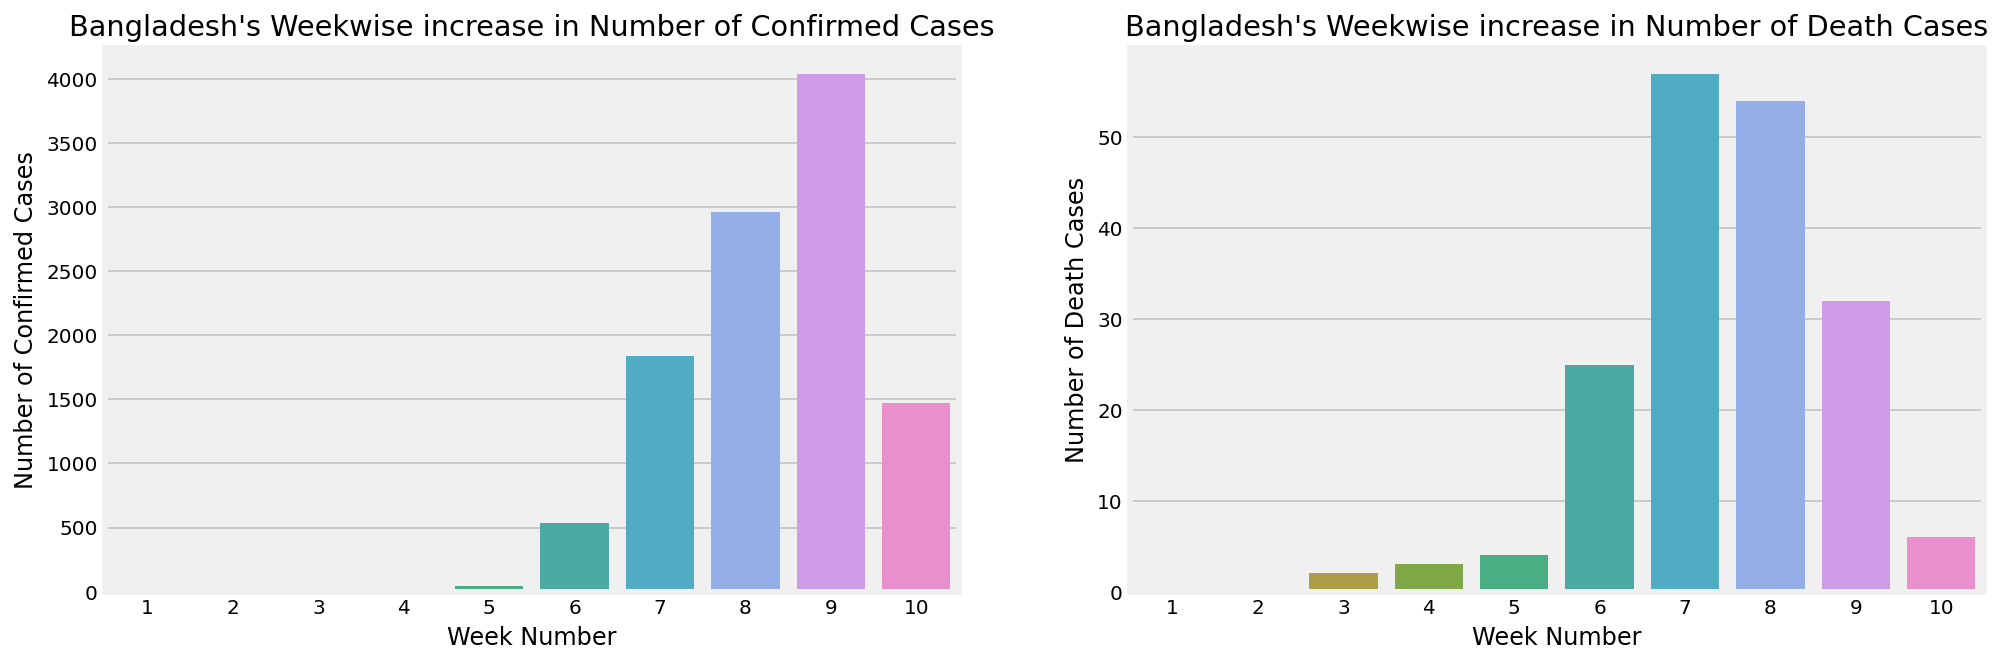

In [15]:
print("Average weekly increase in number of Confirmed Cases",round(pd.Series(bd_weekwise_confirmed).diff().fillna(0).mean()))
print("Average weekly increase in number of Recovered Cases",round(pd.Series(bd_weekwise_recovered).diff().fillna(0).mean()))
print("Average weekly increase in number of Death Cases",round(pd.Series(bd_weekwise_deaths).diff().fillna(0).mean()))

fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(x=week_num_bd,y=pd.Series(bd_weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num_bd,y=pd.Series(bd_weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("Bangladesh's Weekwise increase in Number of Confirmed Cases")
ax2.set_title("Bangladesh's Weekwise increase in Number of Death Cases")

In [16]:
last_update = '5/4/20'            #Month/Date/Year                                  
current_cases = confirmed_df
current_cases = current_cases[['Country/Region',last_update]]

current_cases = current_cases.groupby('Country/Region').sum().sort_values(by=last_update, ascending=False)

current_cases['recovered'] = recoveries_df[['Country/Region',last_update]].groupby('Country/Region').sum().sort_values(by=last_update,ascending=False)

current_cases['deaths'] = deaths_df[['Country/Region',last_update]].groupby('Country/Region').sum().sort_values(by=last_update,ascending=False)

current_cases['active'] = current_cases[last_update]-current_cases['recovered']-current_cases['deaths']

current_cases = current_cases.rename(columns={last_update:'confirmed'
                                              ,'recovered':'recovered'
                                              ,'deaths':'deaths'
                                              ,'active':'active'})

current_cases.style.background_gradient(cmap='Blues')

,confirmed,recovered,deaths,active
Country/Region,,,,
US,1180375,187180,68922,924273
Spain,218011,121343,25428,71240
Italy,211938,82879,29079,99980
United Kingdom,191832,910,28809,162113
France,169583,51476,25204,92903
Germany,166152,132700,6993,26459
Russia,145268,18095,1356,125817
Turkey,127659,68166,3461,56032
Brazil,108620,45815,7367,55438


In [17]:
top_10_confirmed = confirmed_df[(confirmed_df['Country/Region']=='Bangladesh') |
                             (confirmed_df['Country/Region']=='US') |
                             (confirmed_df['Country/Region']=='China') |
                             (confirmed_df['Country/Region']=='Italy') |
                             (confirmed_df['Country/Region']=='Spain') |
                             (confirmed_df['Country/Region']=='United Kingdom') |
                             (confirmed_df['Country/Region']=='France') |
                             (confirmed_df['Country/Region']=='Germany') |
                             (confirmed_df['Country/Region']=='United Kingdom')]

top_10_confirmed = top_10_confirmed.groupby(top_10_confirmed['Country/Region']).sum()

top_10_confirmed = top_10_confirmed.drop(['Lat','Long'], axis = 1)
top_10_confirmed = top_10_confirmed.transpose()
top_10_confirmed

Country/Region,Bangladesh,China,France,Germany,Italy,Spain,US,United Kingdom
1/22/20,0,548,0,0,0,0,1,0
1/23/20,0,643,0,0,0,0,1,0
1/24/20,0,920,2,0,0,0,2,0
1/25/20,0,1406,3,0,0,0,2,0
1/26/20,0,2075,3,0,0,0,5,0
...,...,...,...,...,...,...,...,...
5/1/20,8238,83959,167305,164077,207428,213435,1103461,178685
5/2/20,8790,83959,168518,164967,209328,216582,1132539,183500
5/3/20,9455,83964,168925,165664,210717,217466,1158040,187842
5/4/20,10143,83966,169583,166152,211938,218011,1180375,191832


In [18]:
layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)'
    , plot_bgcolor='rgba(0,0,0,0)'
    , title="Cases over time in Top Countries in terms of confirmed cases numbers"
)

index = top_10_confirmed.index
data = top_10_confirmed

fig = go.Figure(data=[
    
    go.Line(name='Bangladesh', x = index, y=data['Bangladesh'])
    , go.Line(name='US', x = index, y=data['US'])
    , go.Line(name='China', x = index, y=data['China'])
    , go.Line(name='Italy', x = index, y=data['Italy'])
    , go.Line(name='Spain', x = index, y=data['Spain'])
    , go.Line(name='United Kingdom', x=index, y=data['United Kingdom'])
    , go.Line(name='France', x=index , y=data['France'])
    , go.Line(name='Germany', x = index, y=data['Germany'])
    
])

fig['layout'].update(layout)

fig.show()

In [19]:
top10_since_first_case = top_10_confirmed.reset_index()
top10_since_first_case = top10_since_first_case.drop('index',axis=1)
top10_since_first_case['Bangladesh'] = top10_since_first_case['Bangladesh'].shift(-35)
top10_since_first_case['Italy'] = top10_since_first_case['Italy'].shift(-9)
top10_since_first_case['Spain'] = top10_since_first_case['Spain'].shift(-10)
top10_since_first_case['United Kingdom'] = top10_since_first_case['United Kingdom'].shift(-9)
top10_since_first_case['Germany'] = top10_since_first_case['Germany'].shift(-5)
top10_since_first_case['France'] = top10_since_first_case['France'].shift(-2)

# creating the plot
top10_since_first_case_log = np.log(top10_since_first_case)

layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)'
    , plot_bgcolor='rgba(0,0,0,0)'
    , title="Log of Top Countries VS Bangladesh since 1st case appear"
)

index = top10_since_first_case_log.index
data = top10_since_first_case_log

fig = go.Figure(data=[
    
    go.Line(name='Bangladesh', x=index , y=data['Bangladesh'])
    , go.Line(name='US', x = index, y=data['US'])
    , go.Line(name='Italy', x = index, y=data['Italy'])
    , go.Line(name='China', x = index, y=data['China'])
    , go.Line(name='Spain', x = index, y=data['Spain'])
    , go.Line(name='France', x=index , y=data['France'])
    , go.Line(name='Germany', x = index, y=data['Germany'])
    , go.Line(name='United Kingdom', x = index, y=data['United Kingdom'])
  
])

fig['layout'].update(layout)

fig.show()

**PREDICTION**

Root Mean Squared Error for Polynomial Regression:  540.9432996782624


,Date,Polynomial Regression Prediction
0,2020-05-06,13150.013027
1,2020-05-07,14930.378728
2,2020-05-08,17177.141930
3,2020-05-09,20017.645110
4,2020-05-10,23604.585574


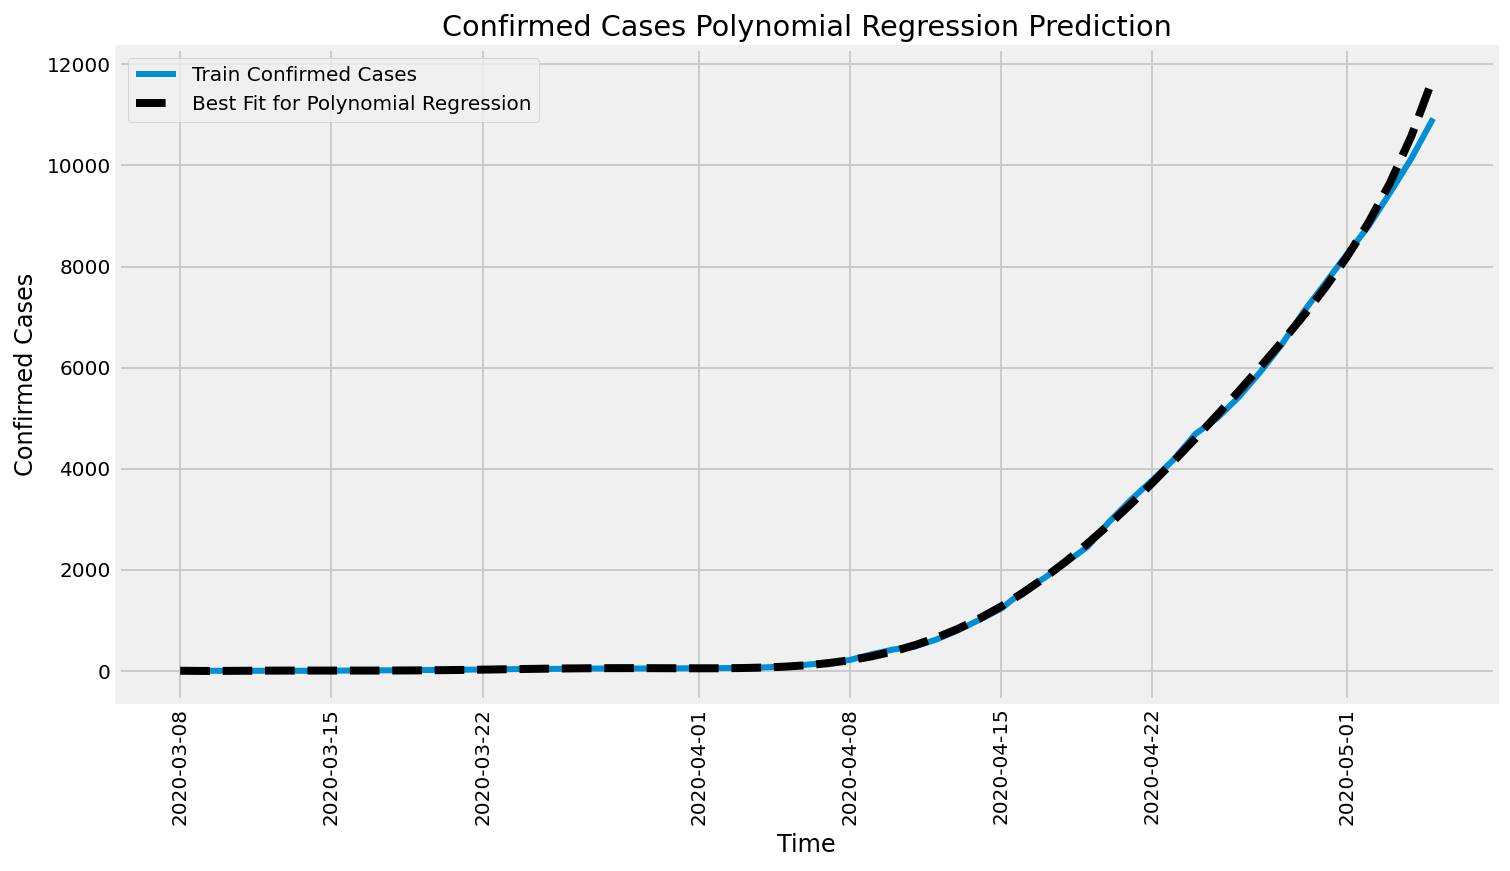

In [20]:
train_ml=bd_datewise.iloc[:int(bd_datewise.shape[0]*0.95)]
valid_ml=bd_datewise.iloc[int(bd_datewise.shape[0]*0.95):]
model_scores=[]

poly = PolynomialFeatures(degree = 8) 

train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["Confirmed"]

linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)

prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly) 

comp_data=poly.fit_transform(np.array(bd_datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)
plt.plot(bd_datewise["Confirmed"],label="Train Confirmed Cases",linewidth=3)
plt.plot(bd_datewise.index,predictions_poly, linestyle='--',label="Best Fit for Polynomial Regression",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Polynomial Regression Prediction")
plt.xticks(rotation=90)
plt.legend()

new_date=[]
new_prediction_poly=[]
for i in range(1,18):
    new_date.append(bd_datewise.index[-1]+timedelta(days=i))
    new_date_poly=poly.fit_transform(np.array(bd_datewise["Days Since"].max()+i).reshape(-1,1))
    new_prediction_poly.append(linreg.predict(new_date_poly)[0])

model_predictions=pd.DataFrame(zip(new_date,new_prediction_poly),columns=["Date","Polynomial Regression Prediction"])
model_predictions.head()

Root Mean Square Error for SVR Model:  2497.5523488376616


,Date,Polynomial Regression Prediction,SVM Prediction
0,2020-05-06,13150.013027,15479.713416
1,2020-05-07,14930.378728,17121.324007
2,2020-05-08,17177.141930,18905.586882
3,2020-05-09,20017.645110,20842.251223
4,2020-05-10,23604.585574,22941.557610


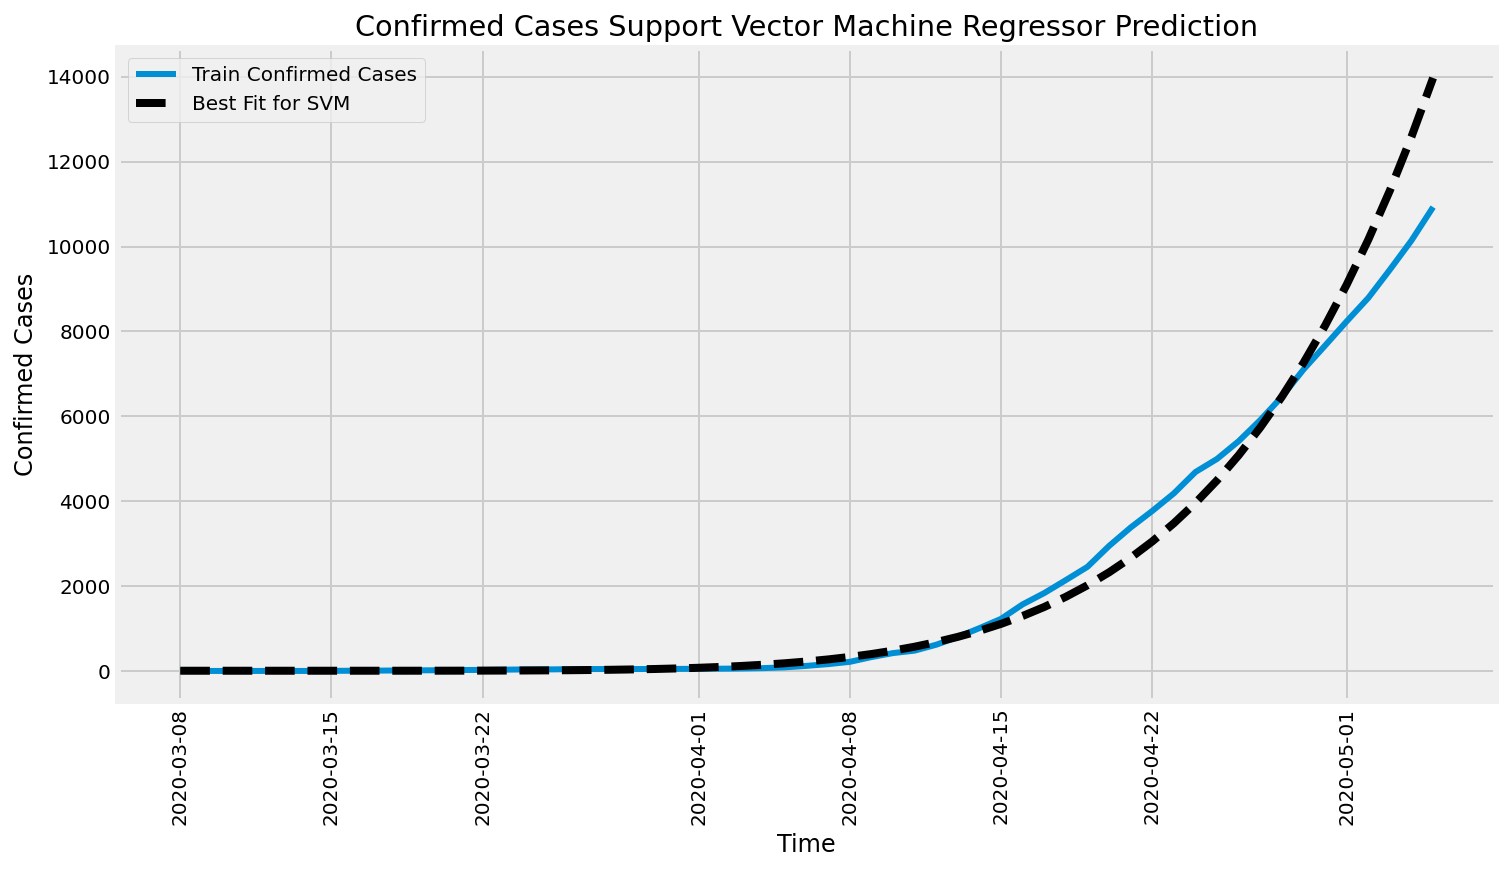

In [22]:
train_ml=bd_datewise.iloc[:int(bd_datewise.shape[0]*0.95)]
valid_ml=bd_datewise.iloc[int(bd_datewise.shape[0]*0.95):]

svm=SVR(C=1,degree=6,kernel='poly')

svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),train_ml["Confirmed"])

prediction_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
rmse_svm=np.sqrt(mean_squared_error(prediction_svm,valid_ml["Confirmed"]))
model_scores.append(rmse_svm)
print("Root Mean Square Error for SVR Model: ",rmse_svm)

plt.figure(figsize=(11,6))
predictions=svm.predict(np.array(bd_datewise["Days Since"]).reshape(-1,1))
plt.plot(bd_datewise["Confirmed"],label="Train Confirmed Cases",linewidth=3)
plt.plot(bd_datewise.index,predictions, linestyle='--',label="Best Fit for SVM",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Support Vector Machine Regressor Prediction")
plt.xticks(rotation=90)
plt.legend()

new_date=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(bd_datewise.index[-1]+timedelta(days=i))
    new_prediction_svm.append(svm.predict(np.array(bd_datewise["Days Since"].max()+i).reshape(-1,1))[0])

model_predictions["SVM Prediction"]=new_prediction_svm
model_predictions.head()

Root Mean Square Error Holt's Linear Model:  351.78768825789706


,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction
0,2020-05-06,13150.013027,15479.713416,10942.219952
1,2020-05-07,14930.378728,17121.324007,11481.307477
2,2020-05-08,17177.141930,18905.586882,12020.395001
3,2020-05-09,20017.645110,20842.251223,12559.482526
4,2020-05-10,23604.585574,22941.557610,13098.570051


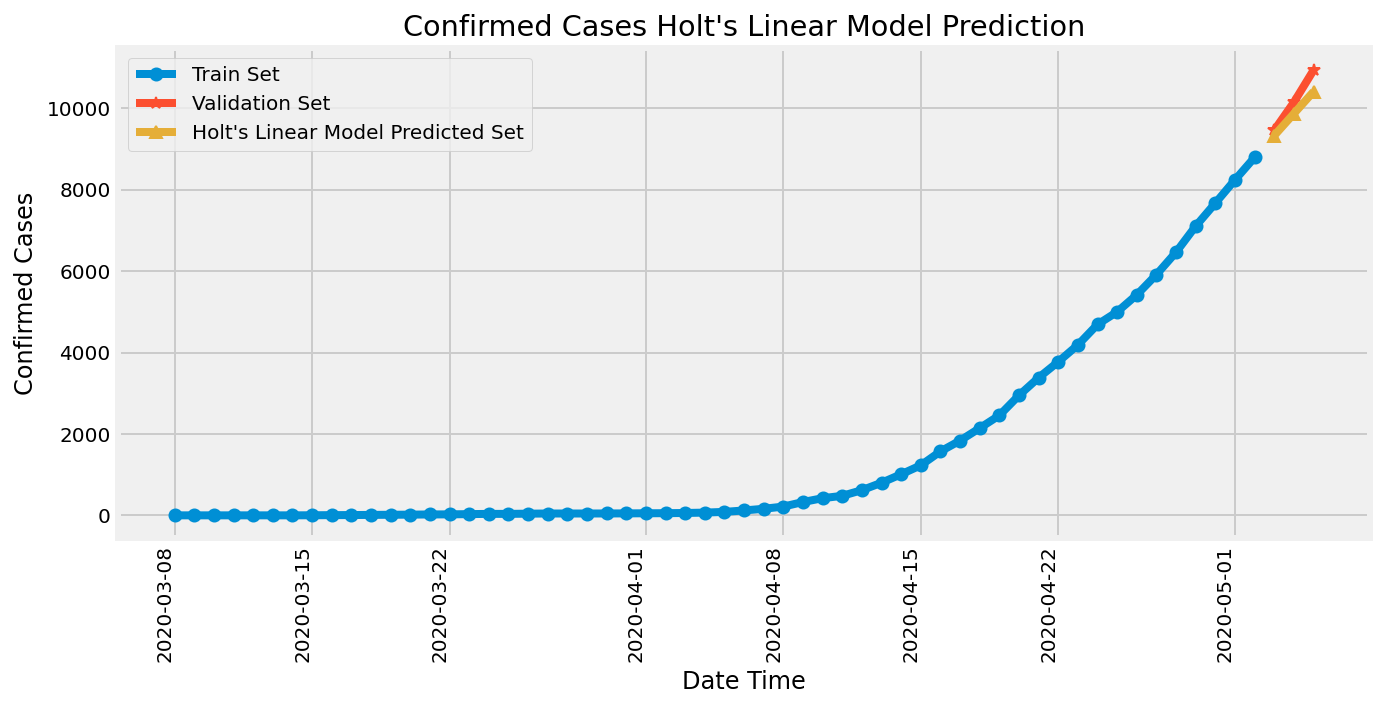

In [23]:
model_train=bd_datewise.iloc[:int(bd_datewise.shape[0]*0.95)]
valid=bd_datewise.iloc[int(bd_datewise.shape[0]*0.95):]
y_pred=valid.copy()

holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.1, smoothing_slope=1.1)

y_pred["Holt"]=holt.forecast(len(valid))
rmse_holt_linear=np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"]))
model_scores.append(rmse_holt_linear)
print("Root Mean Square Error Holt's Linear Model: ",rmse_holt_linear)

plt.figure(figsize=(10,5))
plt.plot(model_train.Confirmed,label="Train Set",marker='o')
valid.Confirmed.plot(label="Validation Set",marker='*')
y_pred.Holt.plot(label="Holt's Linear Model Predicted Set",marker='^')
plt.ylabel("Confirmed Cases")
plt.xlabel("Date Time")
plt.title("Confirmed Cases Holt's Linear Model Prediction")
plt.xticks(rotation=90)
plt.legend()

holt_new_prediction=[]
for i in range(1,18):
    holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holt's Linear Model Prediction"]=holt_new_prediction
model_predictions.head()

Root Mean Square Error for Holt's Winter Model:  106.26947376909352


,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction
0,2020-05-06,13150.013027,15479.713416,10942.219952,11509.601427
1,2020-05-07,14930.378728,17121.324007,11481.307477,12293.041874
2,2020-05-08,17177.141930,18905.586882,12020.395001,13128.569352
3,2020-05-09,20017.645110,20842.251223,12559.482526,14009.930189
4,2020-05-10,23604.585574,22941.557610,13098.570051,14949.300597


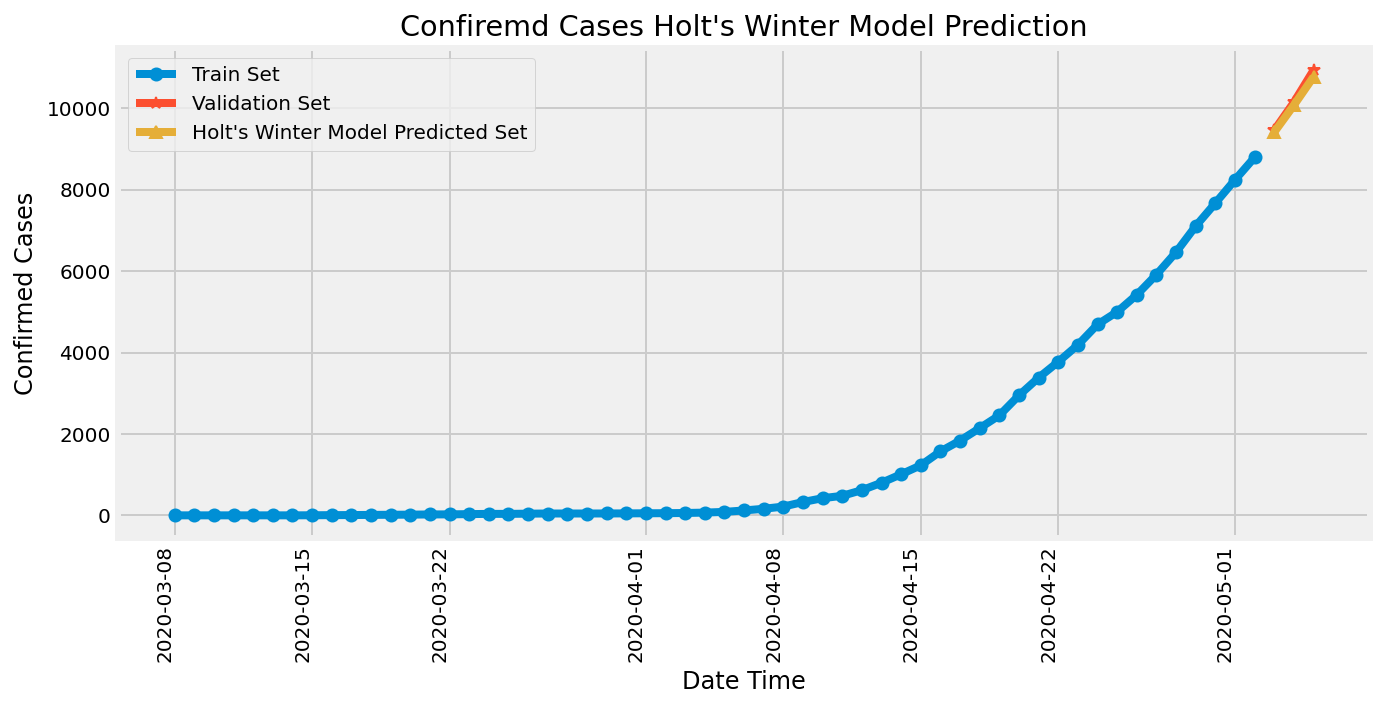

In [24]:
model_train=bd_datewise.iloc[:int(bd_datewise.shape[0]*0.95)]
valid=bd_datewise.iloc[int(bd_datewise.shape[0]*0.95):]
y_pred=valid.copy()

es=ExponentialSmoothing(np.asarray(model_train['Confirmed']),seasonal_periods=2,trend='mul', seasonal='add').fit()

y_pred["Holt's Winter Model"]=es.forecast(len(valid))
rmse_holt_winter=np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"]))
model_scores.append(rmse_holt_winter)
print("Root Mean Square Error for Holt's Winter Model: ",rmse_holt_winter)

plt.figure(figsize=(10,5))
plt.plot(model_train.Confirmed,label="Train Set",marker='o')
valid.Confirmed.plot(label="Validation Set",marker='*')
y_pred["Holt\'s Winter Model"].plot(label="Holt's Winter Model Predicted Set",marker='^')
plt.ylabel("Confirmed Cases")
plt.xlabel("Date Time")
plt.title("Confiremd Cases Holt's Winter Model Prediction")
plt.xticks(rotation=90)
plt.legend()

holt_winter_new_prediction=[]
for i in range(1,18):
    holt_winter_new_prediction.append(es.forecast((len(valid)+i))[-1])
model_predictions["Holt's Winter Model Prediction"]=holt_winter_new_prediction
model_predictions.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Root Mean Squared Error for Prophet Model:  93.6923764732994
Figure(720x432)
Figure(648x432)


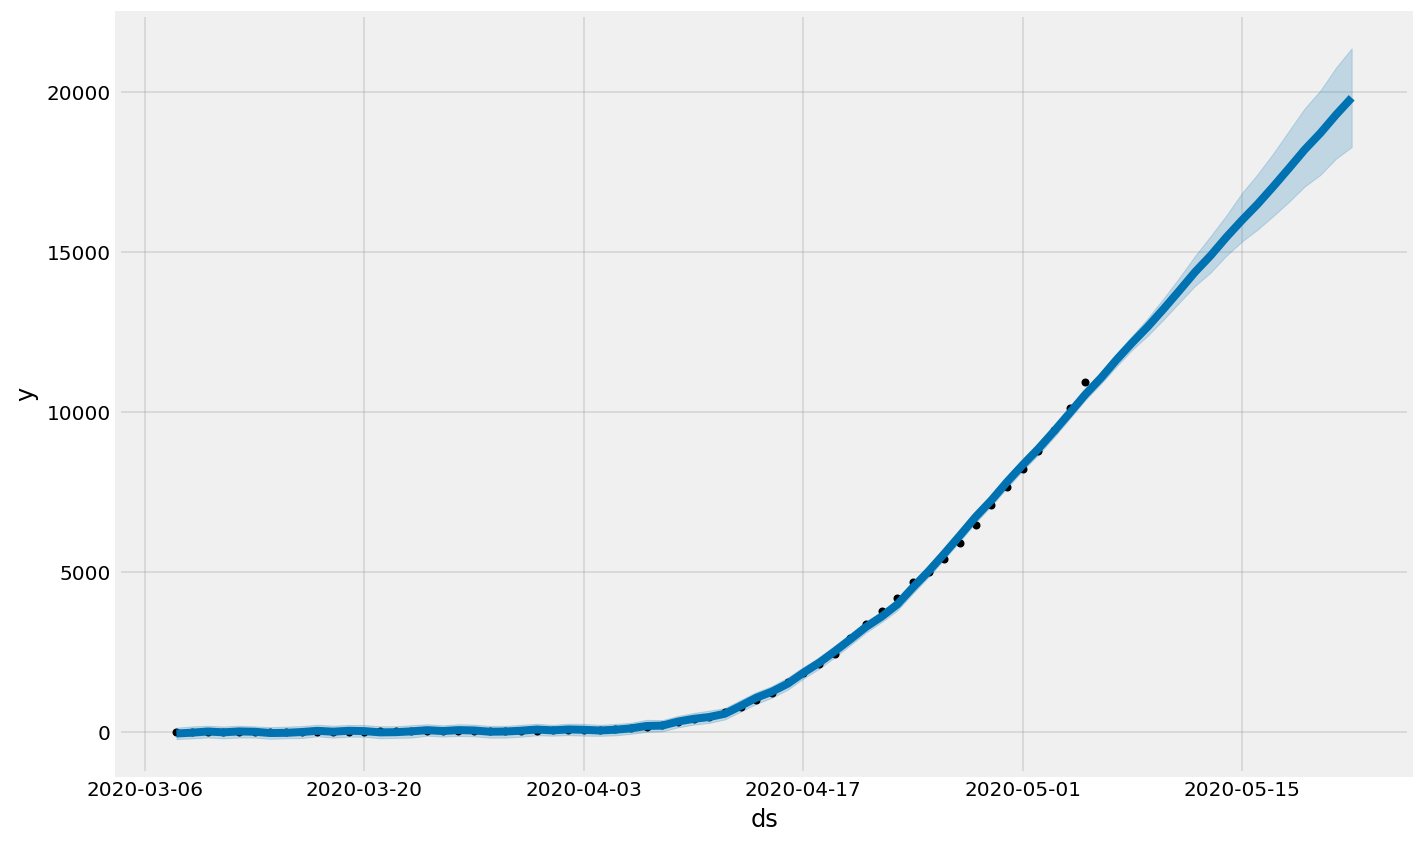

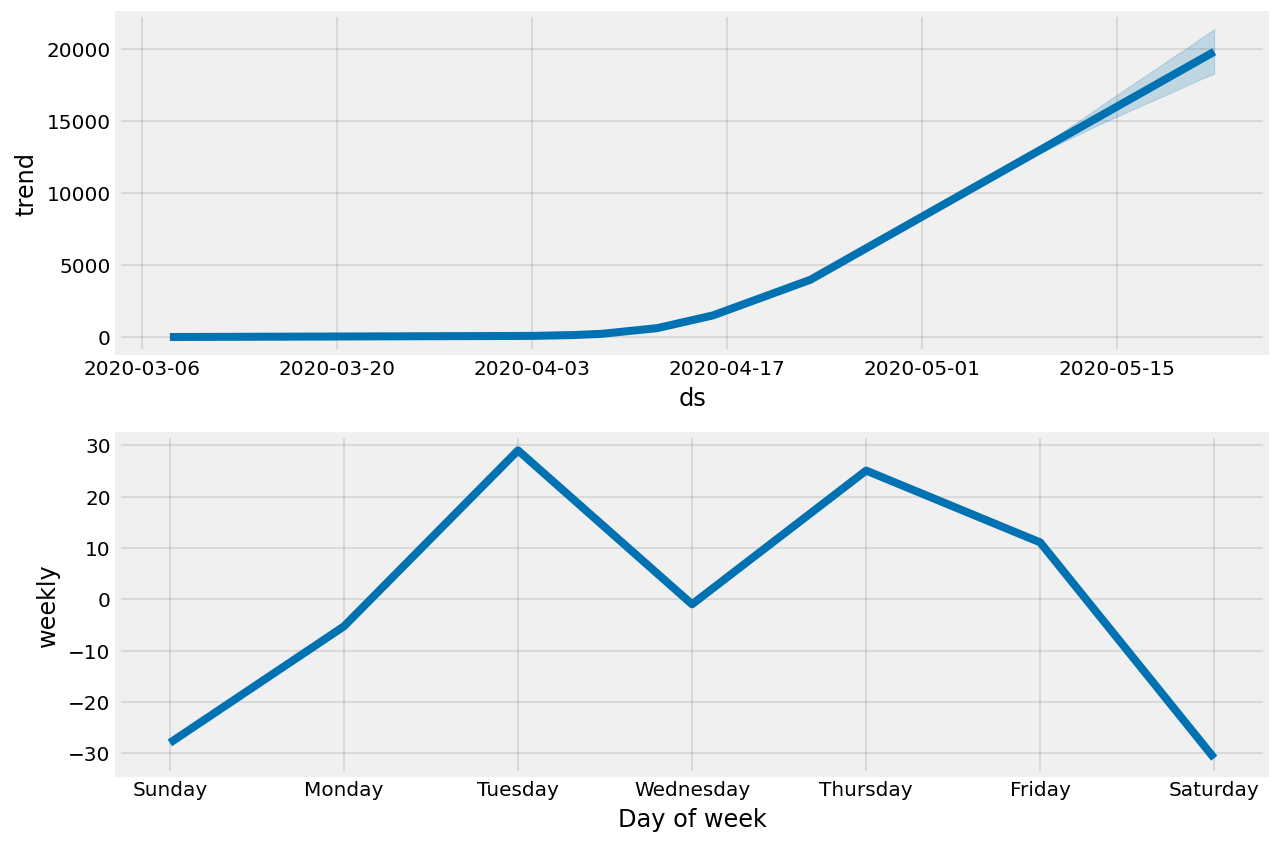

In [25]:
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_confirmed=pd.DataFrame(zip(list(bd_datewise.index),list(bd_datewise["Confirmed"])),columns=['ds','y'])

prophet_c.fit(prophet_confirmed)

forecast_c=prophet_c.make_future_dataframe(periods=17)
forecast_confirmed=forecast_c.copy()

confirmed_forecast=prophet_c.predict(forecast_c)
rmse_prophet=np.sqrt(mean_squared_error(bd_datewise["Confirmed"],confirmed_forecast['yhat'].head(bd_datewise.shape[0])))
model_scores.append(rmse_prophet)

print("Root Mean Squared Error for Prophet Model: ",rmse_prophet)

print(prophet_c.plot(confirmed_forecast))

print(prophet_c.plot_components(confirmed_forecast))

In [26]:
model_predictions["Prophet's Prediction"]=list(confirmed_forecast["yhat"].tail(17))
model_predictions["Prophet's Upper Bound"]=list(confirmed_forecast["yhat_upper"].tail(17))
model_predictions

,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,Prophet's Prediction,Prophet's Upper Bound
0,2020-05-06,13150.013027,15479.713416,10942.219952,11509.601427,11069.067593,11248.529051
1,2020-05-07,14930.378728,17121.324007,11481.307477,12293.041874,11641.542079,11839.622660
2,2020-05-08,17177.141930,18905.586882,12020.395001,13128.569352,12173.992587,12390.445280
3,2020-05-09,20017.645110,20842.251223,12559.482526,14009.930189,12678.402454,12944.763248
4,2020-05-10,23604.585574,22941.557610,13098.570051,14949.300597,13227.821493,13561.387447
5,2020-05-11,28119.510247,25214.254261,13637.657575,15940.785119,13796.950401,14203.493636
6,2020-05-12,33776.632446,27671.613543,14176.745100,16996.939846,14377.656938,14882.706660
7,2020-05-13,40826.988717,30325.448736,14715.832624,18112.272180,14894.125023,15506.074137
8,2020-05-14,49562.954271,33188.131070,15254.920149,19299.765433,15466.599510,16149.186689
9,2020-05-15,60323.136008,36272.607026,15794.007673,20554.380069,15999.050017,16851.807325


In [27]:
models=["Polynomial Regression","Support Vector Machine Regresssor","Holt's Linear Model",
       "Holt's Winter Model","Facebook's Prophet Model"]

model_evaluation=pd.DataFrame(list(zip(models,model_scores)),columns=["Model Name","Root Mean Squared Error"])
model_evaluation.sort_values(["Root Mean Squared Error"])

,Model Name,Root Mean Squared Error
4,Facebook's Prophet Model,106.269474
3,Holt's Winter Model,351.787688
0,Polynomial Regression,540.943300
1,Support Vector Machine Regresssor,2497.552349
2,Holt's Linear Model,2497.552349


In [28]:
model_predictions["Average of Predictions Models"]=model_predictions.mean(axis=1)
model_predictions

,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,Prophet's Prediction,Prophet's Upper Bound,Average of Predictions Models
0,2020-05-06,13150.013027,15479.713416,10942.219952,11509.601427,11069.067593,11248.529051,12233.190744
1,2020-05-07,14930.378728,17121.324007,11481.307477,12293.041874,11641.542079,11839.622660,13217.869471
2,2020-05-08,17177.141930,18905.586882,12020.395001,13128.569352,12173.992587,12390.445280,14299.355172
3,2020-05-09,20017.645110,20842.251223,12559.482526,14009.930189,12678.402454,12944.763248,15508.745792
4,2020-05-10,23604.585574,22941.557610,13098.570051,14949.300597,13227.821493,13561.387447,16897.203795
5,2020-05-11,28119.510247,25214.254261,13637.657575,15940.785119,13796.950401,14203.493636,18485.441873
6,2020-05-12,33776.632446,27671.613543,14176.745100,16996.939846,14377.656938,14882.706660,20313.715756
7,2020-05-13,40826.988717,30325.448736,14715.832624,18112.272180,14894.125023,15506.074137,22396.790236
8,2020-05-14,49562.954271,33188.131070,15254.920149,19299.765433,15466.599510,16149.186689,24820.259520
9,2020-05-15,60323.136008,36272.607026,15794.007673,20554.380069,15999.050017,16851.807325,27632.498020
